In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import ipywidgets as wg
import seaborn as sns # Never came across this package untill now, but it provides an easy way of creating a nice heatmap from 
# a dataframe

### Task 1; Loading in the data

In [2]:
df = pd.read_csv (r'C:\Users\Joseph\Dropbox\Duyfken\KNMI_weather.csv', parse_dates=['YYYYMMDD']) 
# Have not used panda dataframe since my bachelor, but it seems the most common way to load a csv file. 
df.head()

,# STN,YYYYMMDD,FG,TG,RH,PG,NG,UG
0,344,1988-11-01,46,80.0,0,10221.0,4,82
1,344,1988-11-02,36,67.0,27,10241.0,NaN,81
2,344,1988-11-03,26,15.0,0,10340.0,1,77
3,344,1988-11-04,51,12.0,0,10308.0,0,67
4,344,1988-11-05,NaN,22.0,0,10247.0,3,73


In [3]:
df.columns

Index(['# STN', 'YYYYMMDD', '   FG', '   TG', '   RH', '   PG', '   NG',
       '   UG'],
      dtype='object')

In [4]:
#df.rename(columns={'   FG': 'FG', '   TG': 'TG', '   RH': 'RH', '   PG': 'PG', '   NG': 'NG', '   UG': 'UG'}, inplace=True)
#df.columns

### Task 2; Select only data from Rotterdam station 

In [5]:
Rdf = df[df['# STN']==344] # Dataframe with only the data from Rotterdam selected
Rdf.tail()

,# STN,YYYYMMDD,FG,TG,RH,PG,NG,UG
10976,344,2018-11-20,76,34.0,2,10098.0,7,74
10977,344,2018-11-21,38,34.0,2,10162.0,7,85
10978,344,2018-11-22,32,32.0,0,10192.0,7,86
10979,344,2018-11-23,27,34.0,0,10162.0,7,89
10980,344,2018-11-24,35,25.0,0,10116.0,8,94


### Task 3; For each variable, check number of NA's, calculate mean and standard deviation of whole sample

In [6]:
# I assume we keep on working with data only from Rotterdam
naRdf = pd.isna(Rdf) # Create boolean mask of where are NA's 
naRdf.head()

,# STN,YYYYMMDD,FG,TG,RH,PG,NG,UG
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [7]:
NnaRdf = naRdf.sum() # Calculate number of NA's for each variable
NnaRdf

# STN       0
YYYYMMDD    0
   FG       3
   TG       1
   RH       0
   PG       3
   NG       1
   UG       0
dtype: int64

In [8]:
means = Rdf.mean()[1:]# Mean for each variable
print(means)

   TG      107.354189
   RH       23.596303
   PG    10155.823374
   UG       81.845096
dtype: float64


In [9]:
# Above the FG and NG are missing. 
Rdf['   FG'] = Rdf['   FG'].astype(float) # I believe the issue is that FG is int type, so it needs to be converted to float.

# Similarly NG is object type (string)
Rdf['   NG'] = pd.to_numeric(Rdf['   NG'], errors='coerce')

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
# This time it truly works for each variable:
means = Rdf.mean()[1:]
print(means)

   FG       44.300146
   TG      107.354189
   RH       23.596303
   PG    10155.823374
   NG        5.323454
   UG       81.845096
dtype: float64


In [11]:
stds = Rdf.std()[1:] # Standard deviation for each variable
print(stds)

   FG    21.665335
   TG    60.651310
   RH    48.144150
   PG    98.331105
   NG     2.207596
   UG     9.252044
dtype: float64


### Task 4; Plot time series for TG variable

In [12]:
Rdf.columns

Index(['# STN', 'YYYYMMDD', '   FG', '   TG', '   RH', '   PG', '   NG',
       '   UG'],
      dtype='object')

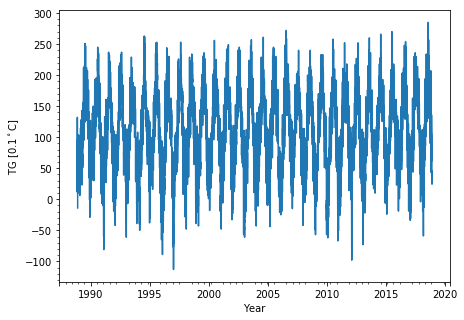

In [13]:
ax = Rdf.plot(x='YYYYMMDD', y='   TG', figsize=(7,5), legend=False)
ax.set_xlabel('Year'); ax.set_ylabel('TG $\mathrm{[0.1^\circ C]}$')
ax.minorticks_on()

### Task 5; Calculate yearly average, minimum and maximum for each variable

In [14]:
Rdf['YYYYMMDD'] = pd.to_datetime(Rdf['YYYYMMDD']) # Not sure why this was needed as I already used the parse_dates-option when 
# loading in the data 
Rdf.set_index('YYYYMMDD', inplace=True) # It is now convenient to set the dates as the index of the dataframe 
Rdf.index

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


DatetimeIndex(['1988-11-01', '1988-11-02', '1988-11-03', '1988-11-04',
               '1988-11-05', '1988-11-06', '1988-11-07', '1988-11-08',
               '1988-11-09', '1988-11-10',
               ...
               '2018-11-15', '2018-11-16', '2018-11-17', '2018-11-18',
               '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22',
               '2018-11-23', '2018-11-24'],
              dtype='datetime64[ns]', name='YYYYMMDD', length=10981, freq=None)

In [15]:
def YearlyAverage(year):
    # Short function to calculate the averages of a given year
    year = str(year)
    print("The averages at R'dam weather station of the year {} were:".format(year), "\n")
    print(Rdf[year].mean()[1:])
    
wg.interact(YearlyAverage, year=(1989,2017))

interactive(children=(IntSlider(value=2003, description='year', max=2017, min=1989), Output()), _dom_classes=(…

<function __main__.YearlyAverage(year)>

In [16]:
def YearlyMax(year):
    # Short function to calculate the maxima of a given year
    year = str(year)
    print("The maxima at R'dam weather station of the year {} were:".format(year), "\n")
    print(Rdf[year].max()[1:])
    
wg.interact(YearlyMax, year=(1989,2017))

interactive(children=(IntSlider(value=2003, description='year', max=2017, min=1989), Output()), _dom_classes=(…

<function __main__.YearlyMax(year)>

In [18]:
def YearlyMin(year):
    # Short function to calculate the minima of a given year
    year = str(year)
    print("The minima at R'dam weather station of the year {} were:".format(year), "\n")
    print(Rdf[year].min()[1:])
    
wg.interact(YearlyMin, year=(1989,2017))

interactive(children=(IntSlider(value=2003, description='year', max=2017, min=1989), Output()), _dom_classes=(…

<function __main__.YearlyMin(year)>

### Task 6; Show the above results on TG (only for the max values) using histogram plots 

In [19]:
YmaxTG = np.tile(np.nan, 29) # Array to store the max TG values between 1988 and 2018

for i,year in enumerate(np.arange(1989, 2018)):
    year = str(year)
    YmaxTG[i] = Rdf.loc[year,'   TG'].max()
    
print(YmaxTG)

[251. 245. 237. 237. 229. 263. 253. 244. 253. 234. 236. 256. 249. 245.
 257. 261. 245. 272. 240. 240. 233. 258. 252. 252. 260. 266. 270. 254.
 236.]


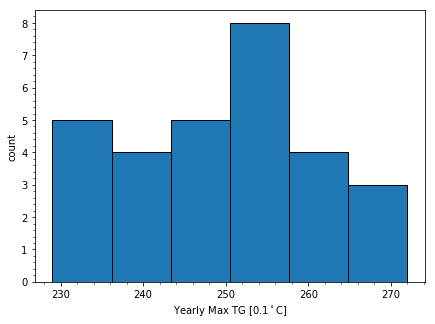

In [20]:
plt.figure(figsize=(7,5))
plt.hist(YmaxTG, bins='auto', edgecolor='black') # Plot the histogram. Set the bins on auto, though finding a good choice is 
# always a sophisticated problem
plt.xlabel('Yearly Max TG $\mathrm{[0.1^\circ C]}$'); plt.ylabel('count')
plt.minorticks_on()

### Task 7; Calculate the Pearson correlation matrix between: TG, RH, PG, NG, UG

In [23]:
CorrVarMatrix = Rdf.loc[:,['   TG','   RH','   PG','   NG','   UG']].corr(method='pearson')
print(CorrVarMatrix)

             TG        RH        PG        NG        UG
   TG  1.000000  0.021457 -0.071123 -0.135812 -0.354765
   RH  0.021457  1.000000 -0.392459  0.310311  0.261879
   PG -0.071123 -0.392459  1.000000 -0.315383 -0.091605
   NG -0.135812  0.310311 -0.315383  1.000000  0.522335
   UG -0.354765  0.261879 -0.091605  0.522335  1.000000


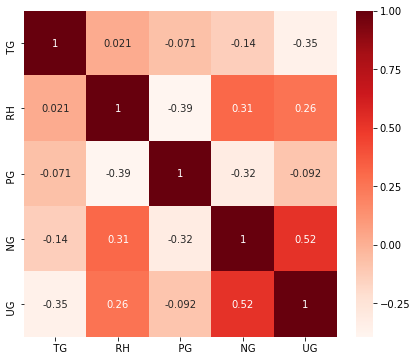

In [27]:
plt.figure(figsize=(7,6))
sns.heatmap(CorrVarMatrix, annot=True, cmap='Reds')